In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image_folder = '/data2/DK39_test/CSHL_data_processed/DK39/czi_raw_output/'

images = ! ls $image_folder

In [3]:
! ls $image_folder

DK39_slide001_2020_01_02_S01_C0_CFP.tif
DK39_slide001_2020_01_02_S01_C1_AF568.tif
DK39_slide001_2020_01_02_S01_C2_TuYFP.tif
DK39_slide001_2020_01_02_S07_C0_CFP.tif
DK39_slide001_2020_01_02_S07_C1_AF568.tif
DK39_slide001_2020_01_02_S07_C2_TuYFP.tif
DK39_slide001_2020_01_02_S17_C0_CFP.tif
DK39_slide001_2020_01_02_S17_C1_AF568.tif
DK39_slide001_2020_01_02_S17_C2_TuYFP.tif
DK39_slide002_2020_01_02_S01_C0_CFP.tif
DK39_slide002_2020_01_02_S01_C1_AF568.tif
DK39_slide002_2020_01_02_S01_C2_TuYFP.tif
DK39_slide002_2020_01_02_S07_C0_CFP.tif
DK39_slide002_2020_01_02_S07_C1_AF568.tif
DK39_slide002_2020_01_02_S07_C2_TuYFP.tif
DK39_slide003_2019_12_26_S01_C0_CFP.tif
DK39_slide003_2019_12_26_S01_C1_AF568.tif
DK39_slide003_2019_12_26_S01_C2_TuYFP.tif
DK39_slide003_2019_12_26_S06_C0_CFP.tif
DK39_slide003_2019_12_26_S06_C1_AF568.tif
DK39_slide003_2019_12_26_S06_C2_TuYFP.tif
DK39_slide003_2019_12_26_S11_C0_CFP.tif
DK39_slide003_2019_12_26_S11_C1_AF568.tif
DK39_slide003_2019_12_26_S11_C2_TuYFP.tif
DK39_sli

In [4]:
fps_ch0 = [image_folder+'DK39_slide050_2019_12_26_S01_C0_CFP.tif',
          image_folder+'DK39_slide055_2020_01_02_S01_C0_CFP.tif',
          image_folder+'DK39_slide060_2019_12_26_S01_C0_CFP.tif',
          image_folder+'DK39_slide065_2019_12_26_S01_C0_CFP.tif']
fps_ch1 = [image_folder+'DK39_slide050_2019_12_26_S01_C1_AF568.tif',
          image_folder+'DK39_slide055_2020_01_02_S01_C1_AF568.tif',
          image_folder+'DK39_slide060_2019_12_26_S01_C1_AF568.tif',
          image_folder+'DK39_slide065_2019_12_26_S01_C1_AF568.tif']
fps_ch2 = [image_folder+'DK39_slide050_2019_12_26_S01_C2_TuYFP.tif',
          image_folder+'DK39_slide055_2020_01_02_S01_C2_TuYFP.tif',
          image_folder+'DK39_slide060_2019_12_26_S01_C2_TuYFP.tif',
          image_folder+'DK39_slide065_2019_12_26_S01_C2_TuYFP.tif']

In [45]:
img1 = cv2.imread( fps_ch0[0] )[::32,::32]
img2 = cv2.imread( fps_ch1[0] )[::32,::32]
img3 = cv2.imread( fps_ch2[0] )[::32,::32]

In [46]:
img1.shape

(1508, 702, 3)

In [62]:
color_img = np.zeros( [1508,702,3] )

color_img[:,:,0] = img1[:,:,0]/5
color_img[:,:,1] = img2[:,:,0]/7
color_img[:,:,2] = img3[:,:,0]/5

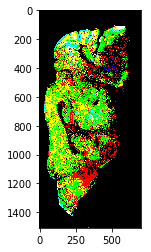

In [63]:
plt.imshow( color_img )

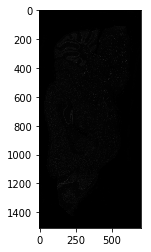

In [64]:
plt.imshow( cv2.imread( fps_ch0[0] )[::32,::32] )

In [5]:
def plot_histogram( img_fp, downsampled=True, plot_to_max=False):
    if downsampled:
        img = cv2.imread(img_fp)[::32,::32]
    else:
        img = cv2.imread(img_fp)
        
    fig, ax = plt.subplots()
    fig.suptitle( img_fp )
    fig.set_figwidth(18)
    
    if plot_to_max:
        unraveled_img = img.ravel()
        max_value = max(unraveled_img)
        ax.hist( unraveled_img, max_value, [0,max_value])
    else:
        ax.hist( img.ravel(), 50, [0,50])
        
    plt.show()

In [41]:
def plot_histogram( img_fp, downsampled=True, plot_to_max=False, take_log=True):
    if downsampled:
        img = cv2.imread(img_fp)[::32,::32]
    else:
        img = cv2.imread(img_fp)
        
    fig, ax = plt.subplots()
    fig.suptitle( img_fp )
    fig.set_figwidth(18)
    
    unraveled_img = img.ravel()
#     if take_log:
#         unraveled_img = np.log2(unraveled_img)
    
    if plot_to_max:
        max_value = max(unraveled_img)
        ax.hist( unraveled_img, max_value, [0,max_value])
    else:
        ax.hist( unraveled_img, 250, [0,250])
        
    ax.set_yscale('log')
        
    plt.show()

In [17]:
np.log2(50)

5.643856189774724

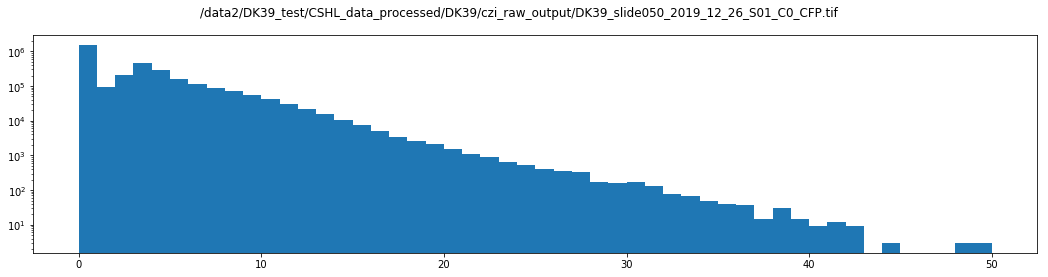

In [35]:
plot_histogram( fps_ch0[0] )

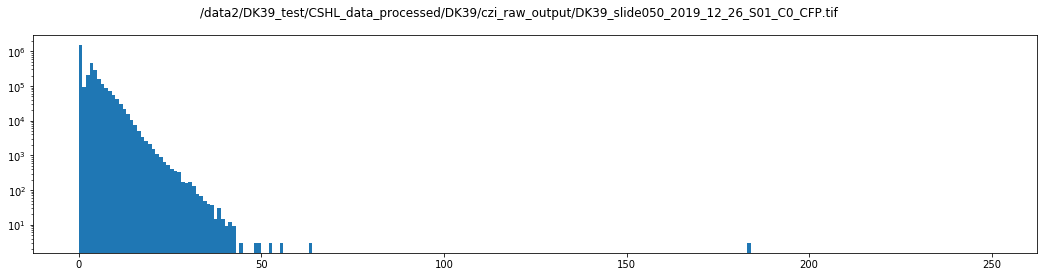

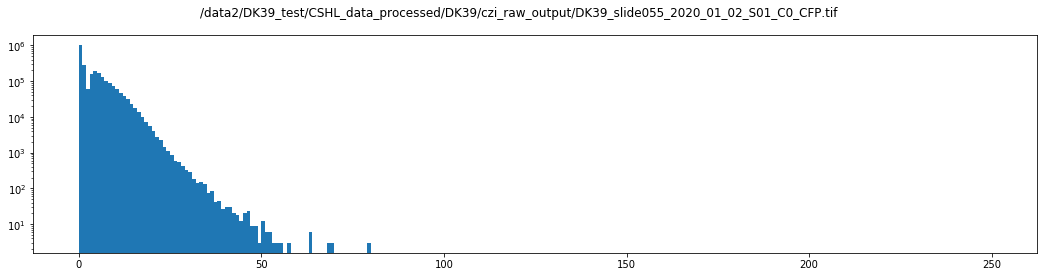

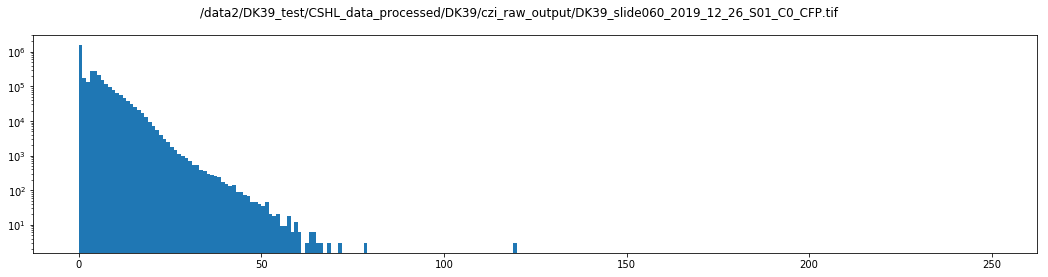

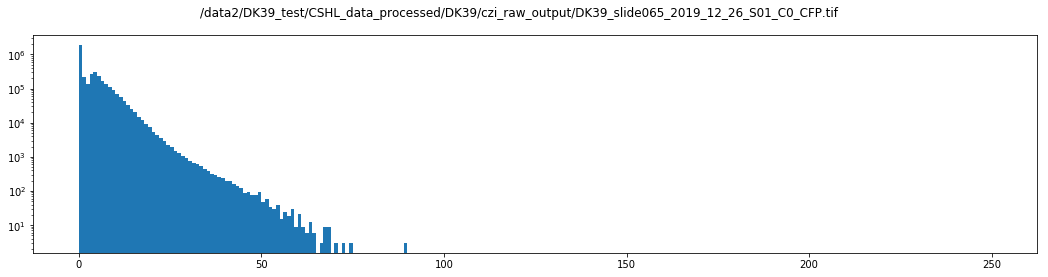

In [42]:
for img_fp in fps_ch0:
    plot_histogram( img_fp )

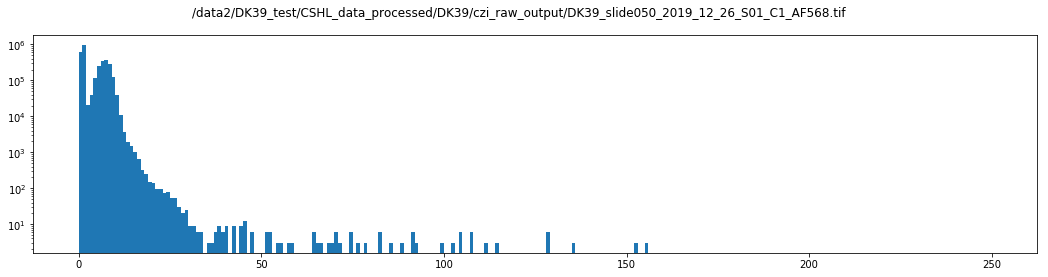

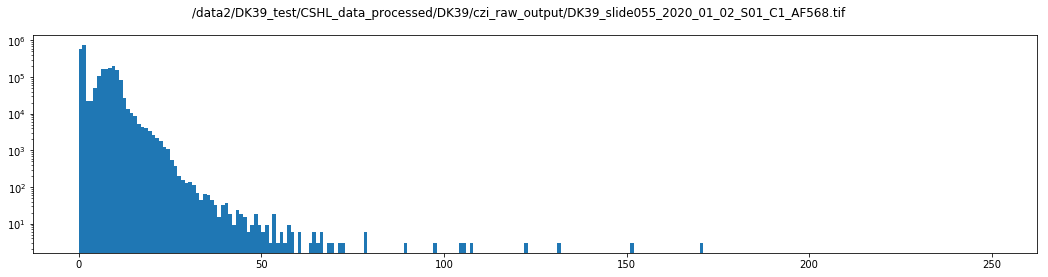

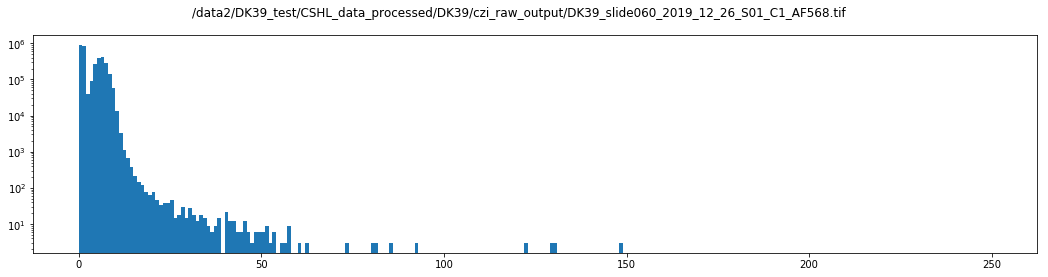

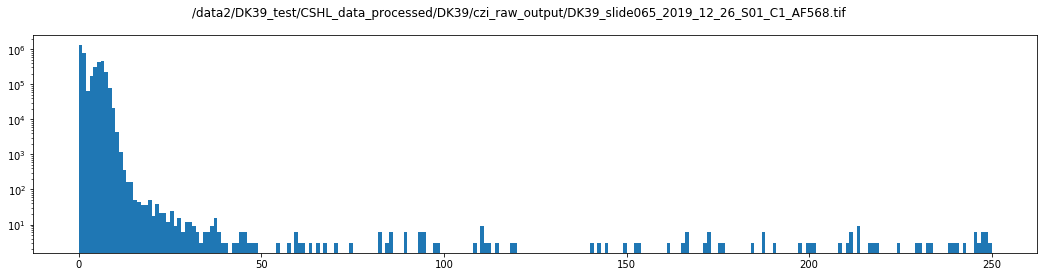

In [43]:
for img_fp in fps_ch1:
    plot_histogram( img_fp )

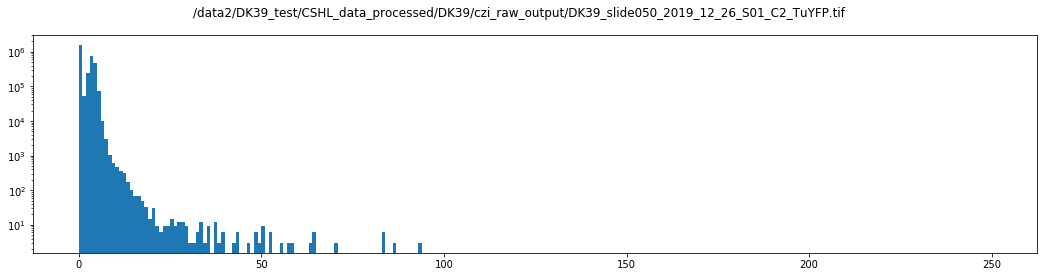

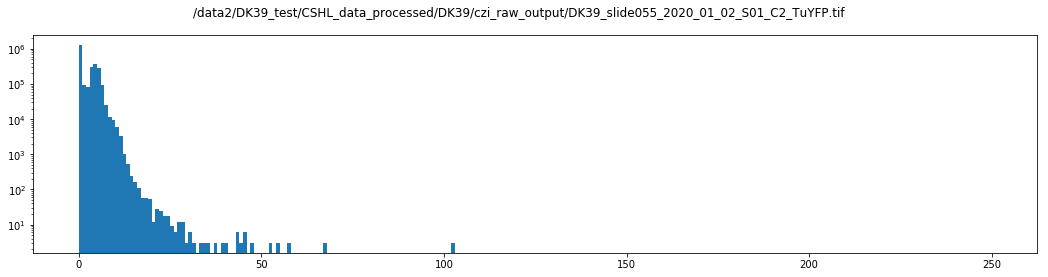

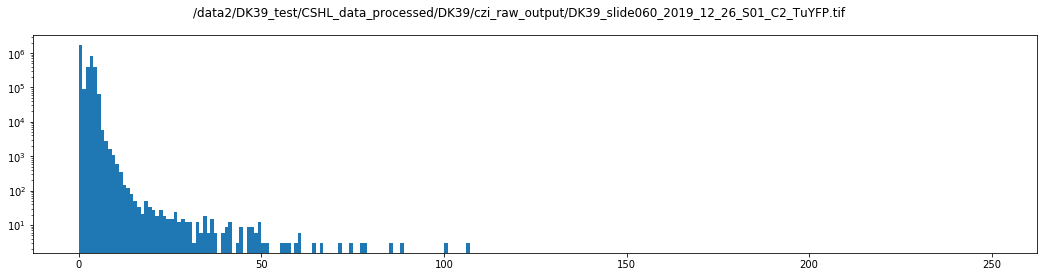

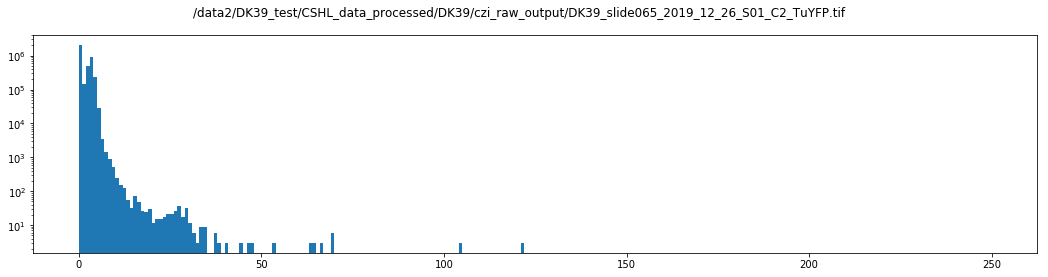

In [44]:
for img_fp in fps_ch2:
    plot_histogram( img_fp )

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log2
  del sys.path[0]


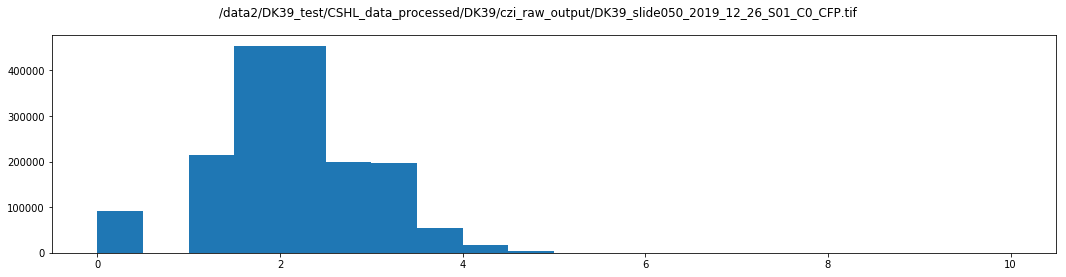

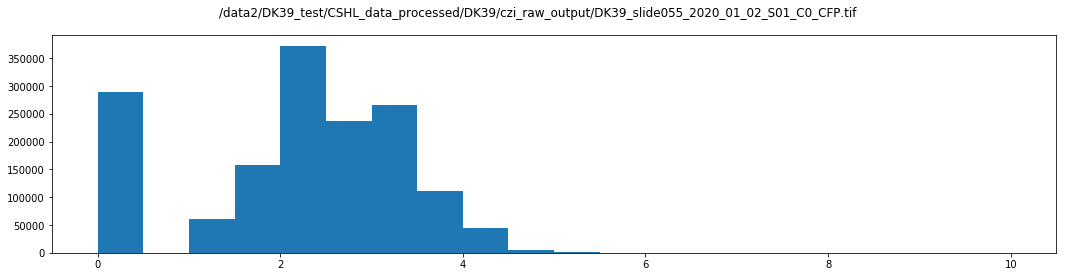

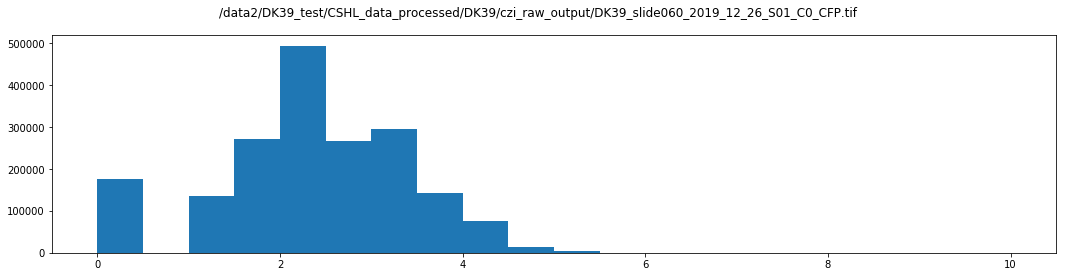

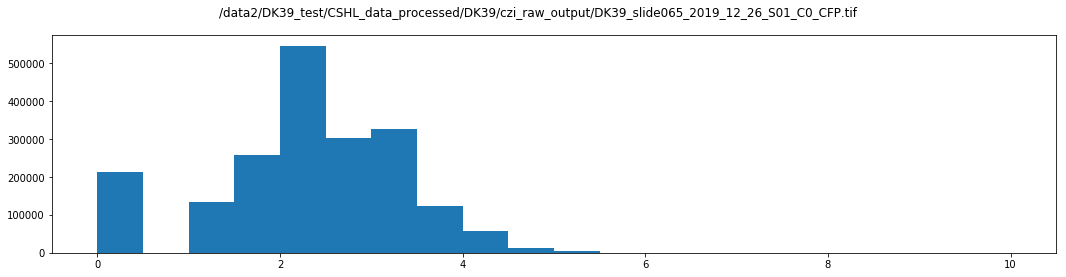

In [24]:
for img_fp in fps_ch0:
    plot_histogram( img_fp )

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log2
  del sys.path[0]


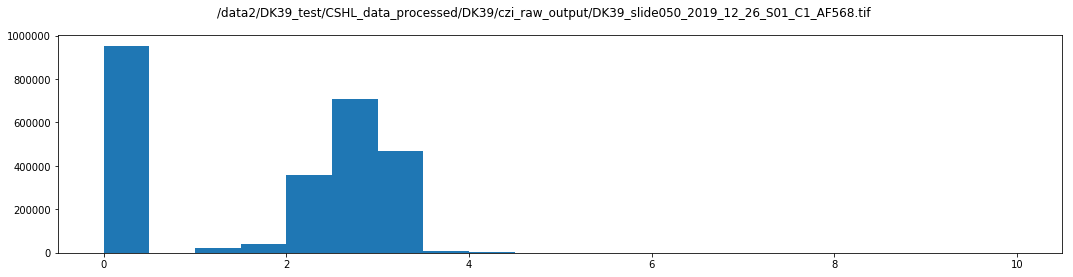

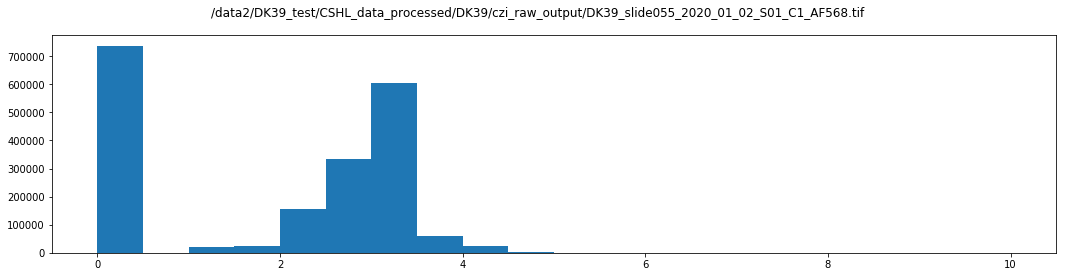

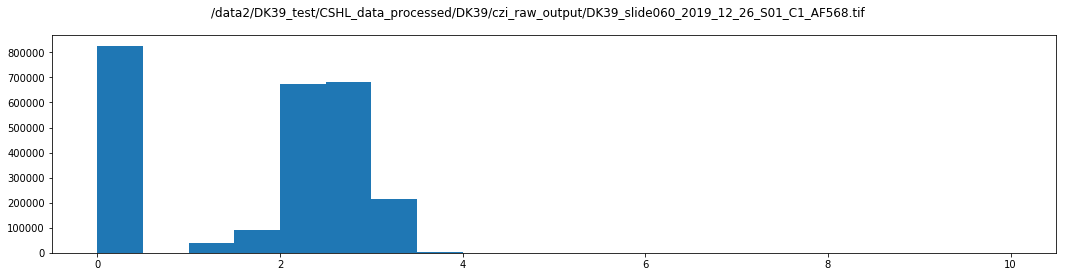

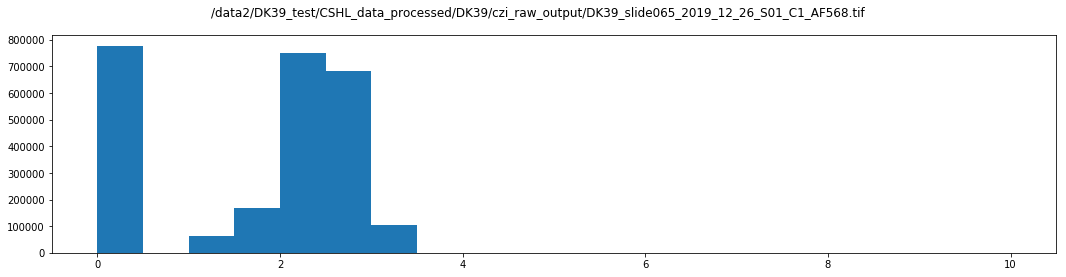

In [25]:
for img_fp in fps_ch1:
    plot_histogram( img_fp )

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log2
  del sys.path[0]


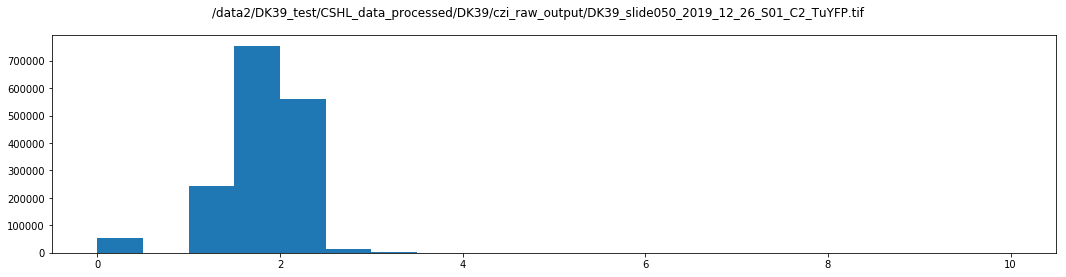

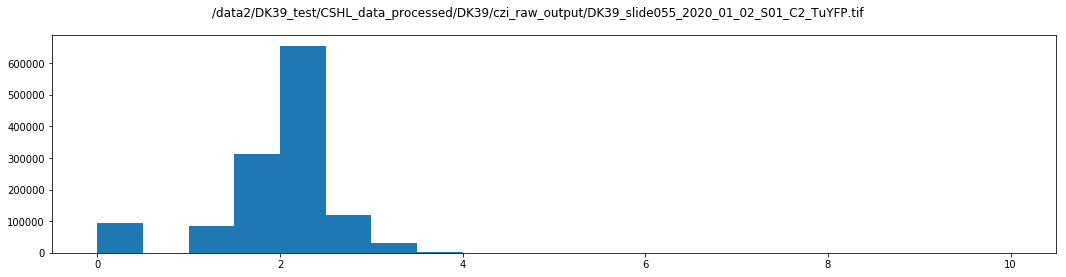

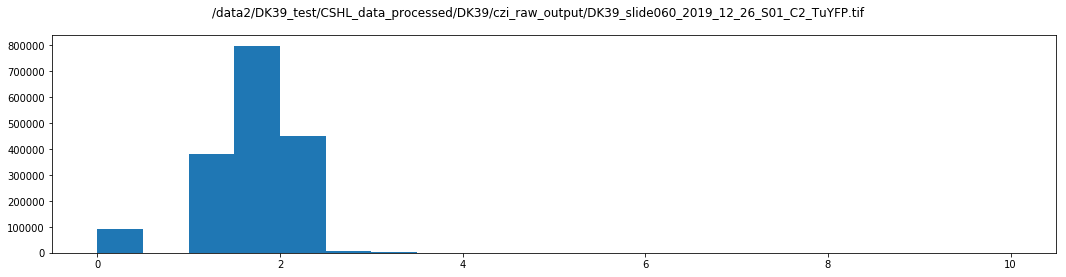

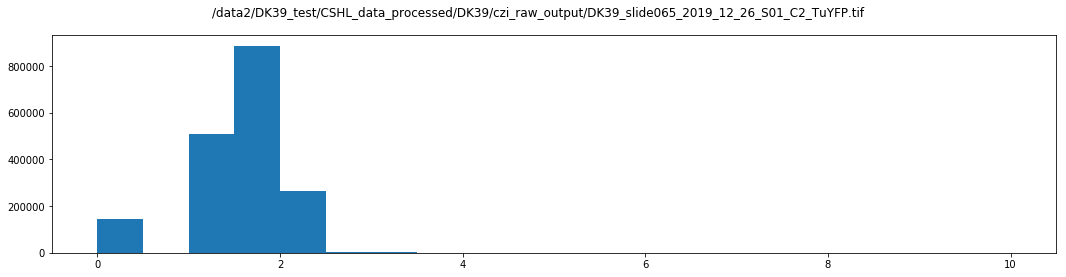

In [26]:
for img_fp in fps_ch2:
    plot_histogram( img_fp )

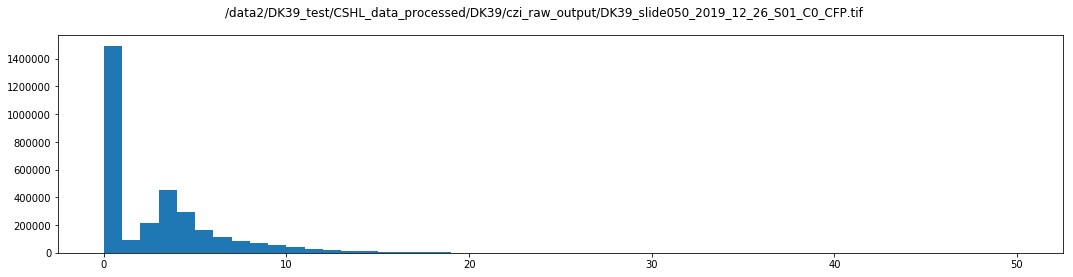

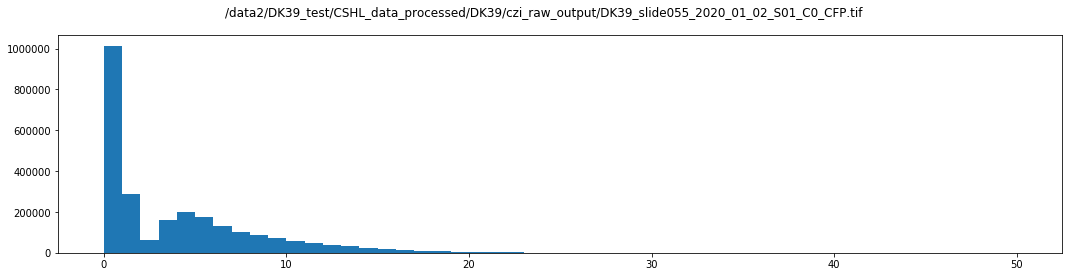

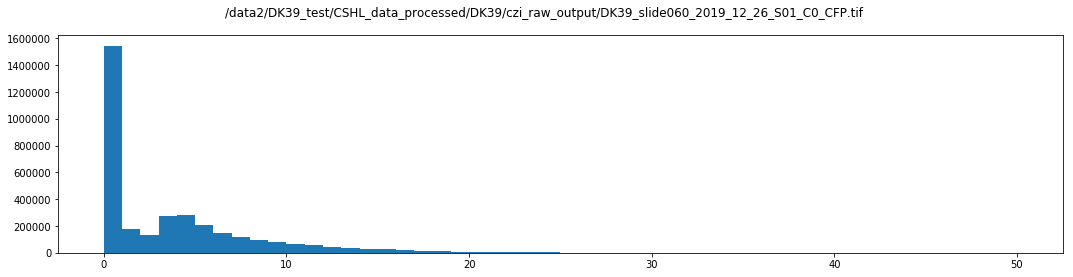

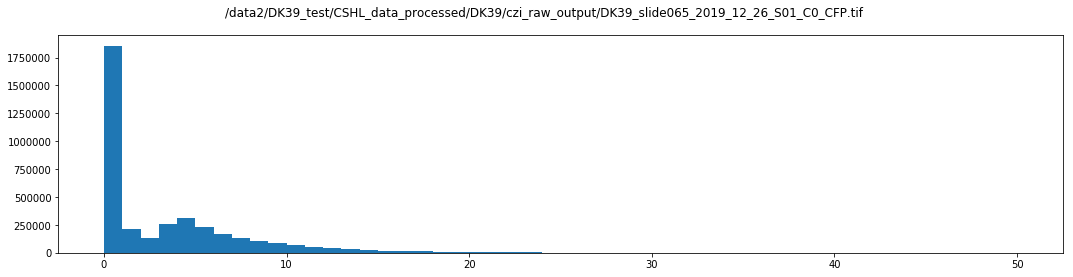

In [50]:
for img_fp in fps_ch0:
    plot_histogram( img_fp )

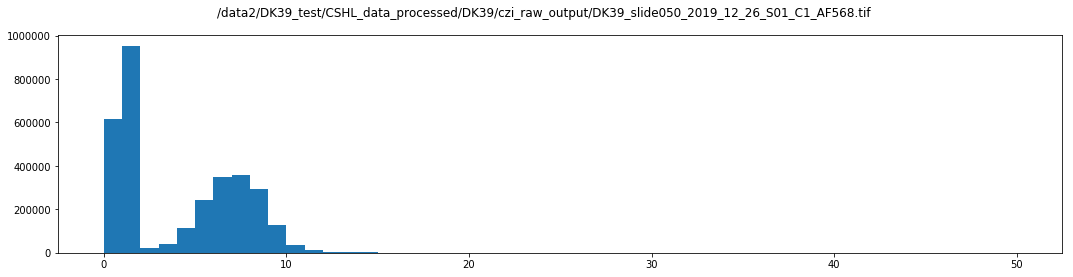

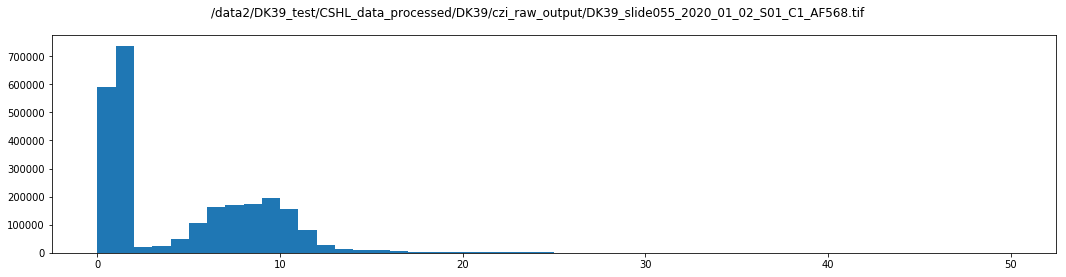

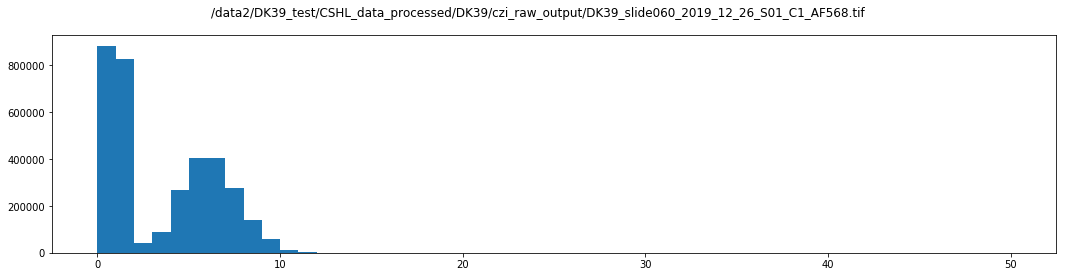

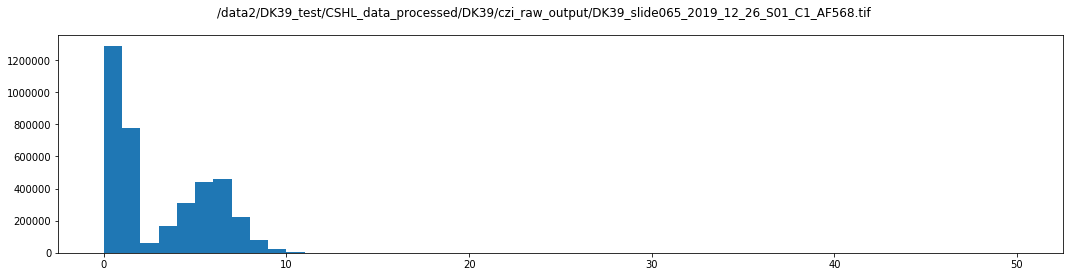

In [51]:
for img_fp in fps_ch1:
    plot_histogram( img_fp )

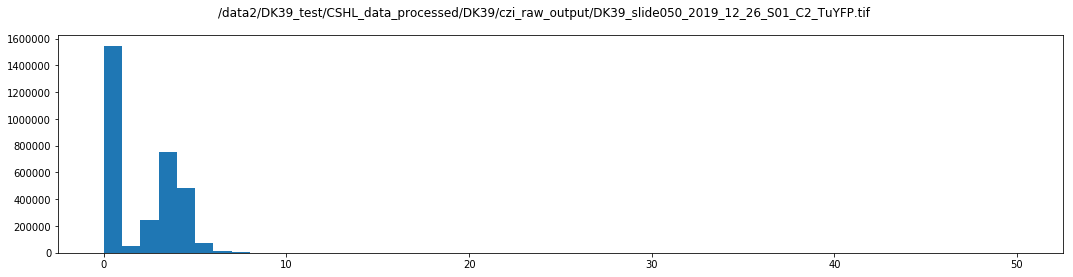

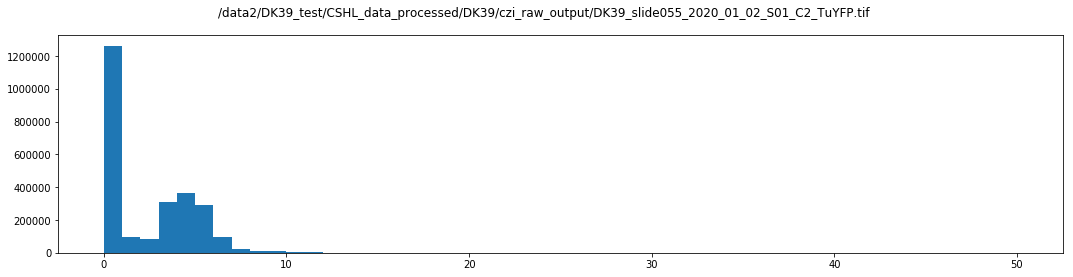

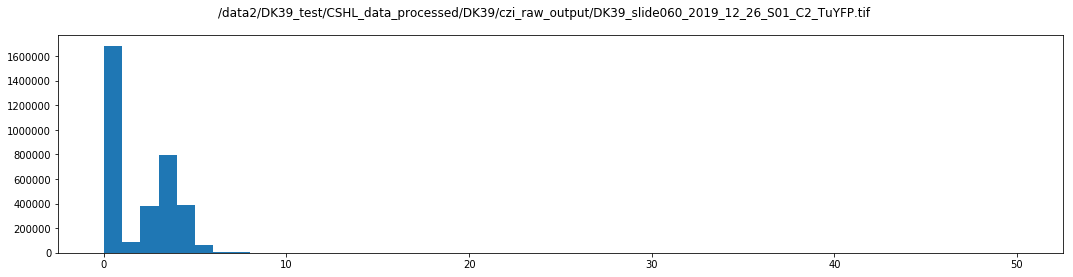

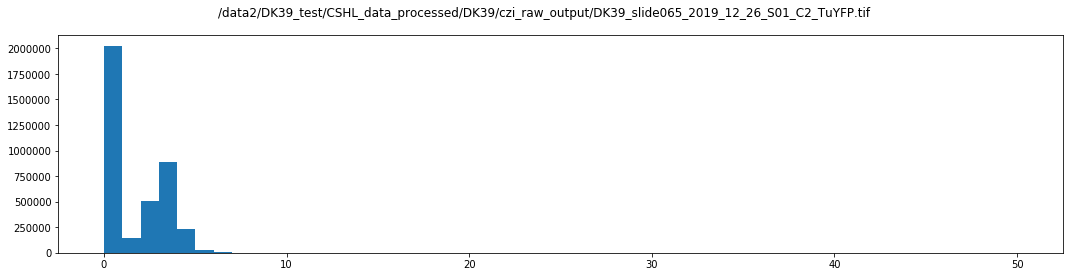

In [52]:
for img_fp in fps_ch2:
    plot_histogram( img_fp )